##### Las librerias más utilizadas para ciencia de datos en python son: matplotlib, scipy, Numpy, Pandas

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy import #un determinado paquete

##### Series

Secuencia de valores similares a una lista con la diferencia de que tiene un indice que pondemos visualizar con pandas

In [3]:
pd.Series(range(0,9),index=['a','b','c','d','e','f','g','h','i'])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
h    7
i    8
dtype: int64

One of the frequent usage of series is time series. In time series, index has a special structure - typically a range of dates or datetimes. We can create such an index with pd.date_range.

Suppose we have a series that shows the amount of product bought every day, and we know that every sunday we also need to take one item for ourselves. Here is how to model that using series:

Numero de vent de helados por dia desde enero 1 del 2020 hasta fin de año

Length of index is 366
2020-01-01    27
2020-01-02    46
2020-01-03    42
2020-01-04    25
2020-01-05    36
              ..
2020-12-27    26
2020-12-28    28
2020-12-29    35
2020-12-30    31
2020-12-31    25
Freq: D, Length: 366, dtype: int32


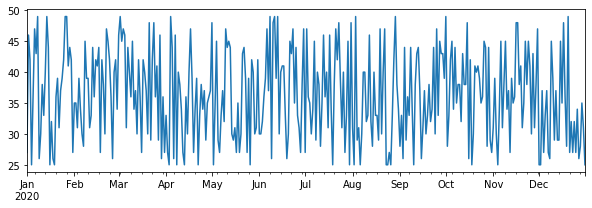

In [9]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
print(items_sold)
items_sold.plot(figsize=(10,3))
plt.show()

10 items mas cada semana

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
2020-01-01    27.0
2020-01-02    46.0
2020-01-03    

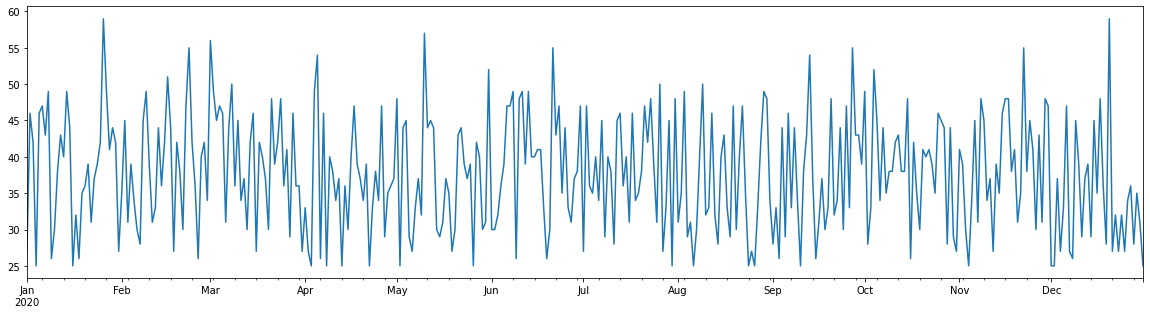

In [15]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(20,5))
plt.show()

podemos volver a muestrear con diferente intervalo de tiempo , esto gracias a timeseries

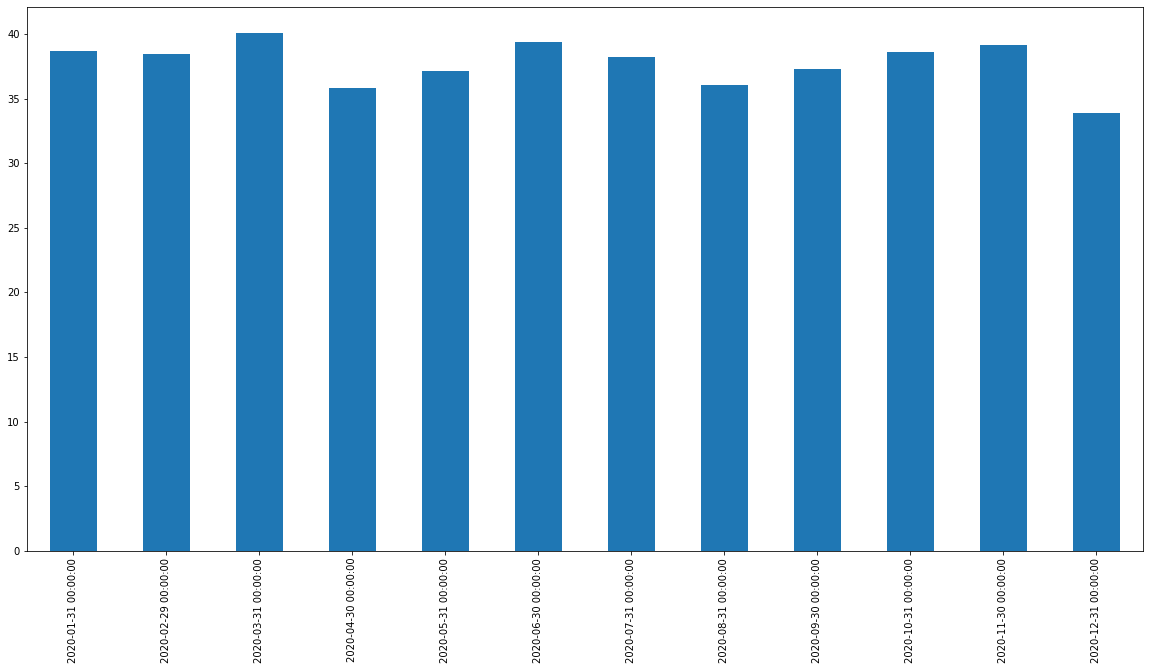

In [18]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(figsize=(20,10),kind='bar')

###### DATAFRAMES

un dataframe es una coleccion de varias series, descritas en forma de columnas que tambien se pueden interpretar como variables, o caracteristicas y las filas como registros de estas variables , es una tabla vista con pandas

In [34]:
rango=np.random.randint(0,50,10)
rango2=np.random.randint(30,78,10)
df=pd.DataFrame(rango,columns=['A'])
df['B']=rango2
print(df)


    A   B
0  38  72
1  49  72
2  42  62
3  45  57
4  39  34
5   7  51
6  18  41
7  36  57
8  22  64
9  15  37


In [39]:
df.describe()
df.info()
df.head()
df.tail()
df.T #La transofrmada intercambia columnas con filas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       10 non-null     int32
 1   B       10 non-null     int32
dtypes: int32(2)
memory usage: 208.0 bytes


,0,1,2,3,4,5,6,7,8,9
A,38,49,42,45,39,7,18,36,22,15
B,72,72,62,57,34,51,41,57,64,37


In [43]:
df['B+1'] = df['B'].apply(lambda x : x+1)
df

,A,B,B+1
0,38,72,73
1,49,72,73
2,42,62,63
3,45,57,58
4,39,34,35
5,7,51,52
6,18,41,42
7,36,57,58
8,22,64,65
9,15,37,38


### Seleccionar rows con iloc

In [45]:
df.iloc[:5] #Selecciona los primeros 5 elementos

,A,B,B+1
0,38,72,73
1,49,72,73
2,42,62,63
3,45,57,58
4,39,34,35
